In [1]:
import pickle
import os
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Amplitude, NumberOfPoints, PersistenceEntropy
from gtda.diagrams import PairwiseDistance

In [2]:
source='/home/wsojka00/Desktop/LatinBERT/pickle_old/'

In [3]:
data={}

authors=[]
for f in os.listdir(source):
    authors.append(f)
authors

for author, file in zip(authors,os.listdir(source)):
    dbfile = open(source+'/'+file,'rb')     
    data[author]=pickle.load(dbfile)

In [4]:
#Create a list with the embedding of the sentences of each authors, then compute the persistence diagram based on vietorisrips filtration of those point clouds

In [5]:
authorstokens = []

for auth in data.keys():
    tokens = [data[auth][n][2] for n in data[auth]]
    tokens = np.array(tokens)
    authorstokens.append(tokens)

In [7]:
VR = VietorisRipsPersistence()

In [8]:
pds = VR.fit_transform(authorstokens)

In [25]:
#Extract and visualize features from the persistence diagrams

In [10]:
#Amplitude


metrics =  ['bottleneck','wasserstein', 'betti', 'landscape', 'silhouette', 'heat', 'persistence_image']

X_features = []
for metric in metrics:
    Ampl = Amplitude(metric=metric, n_jobs=32)
    X_a = Ampl.fit_transform(pds)
    
    X_features.append(X_a[:,0])
    X_features.append(X_a[:,1])

In [11]:
#Persistence Entropy

PE = PersistenceEntropy(normalize=True, nan_fill_value=-1, n_jobs=32)
X_pe = PE.fit_transform(pds)

X_features.append(X_pe[:,0])
X_features.append(X_pe[:,1])

PE = PersistenceEntropy(normalize=False, nan_fill_value=-1, n_jobs=32)
X_pe = PE.fit_transform(pds)

X_features.append(X_pe[:,0])
X_features.append(X_pe[:,1])

In [12]:
#Number of points

NOP = NumberOfPoints(n_jobs=32)
X_nop = NOP.fit_transform(pds)

X_features.append(X_nop[:,0])
X_features.append(X_nop[:,1])

In [13]:
X = np.array(X_features).T
X.shape

(172, 20)

In [15]:
def get_author(filename):
    pos1 = filename.find('_')
    return filename[:pos1]

sauthors=[]
for f in os.listdir(source):
    sauthors.append(get_author(f))

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cauthors = le.fit_transform(sauthors)

In [42]:
np.unique(sauthors)

array(['bacon', 'caesar', 'gestafrancorum', 'plautus', 'sen', 'tacitus',
       'vergil', 'voragine', 'williamtyre'], dtype='<U14')

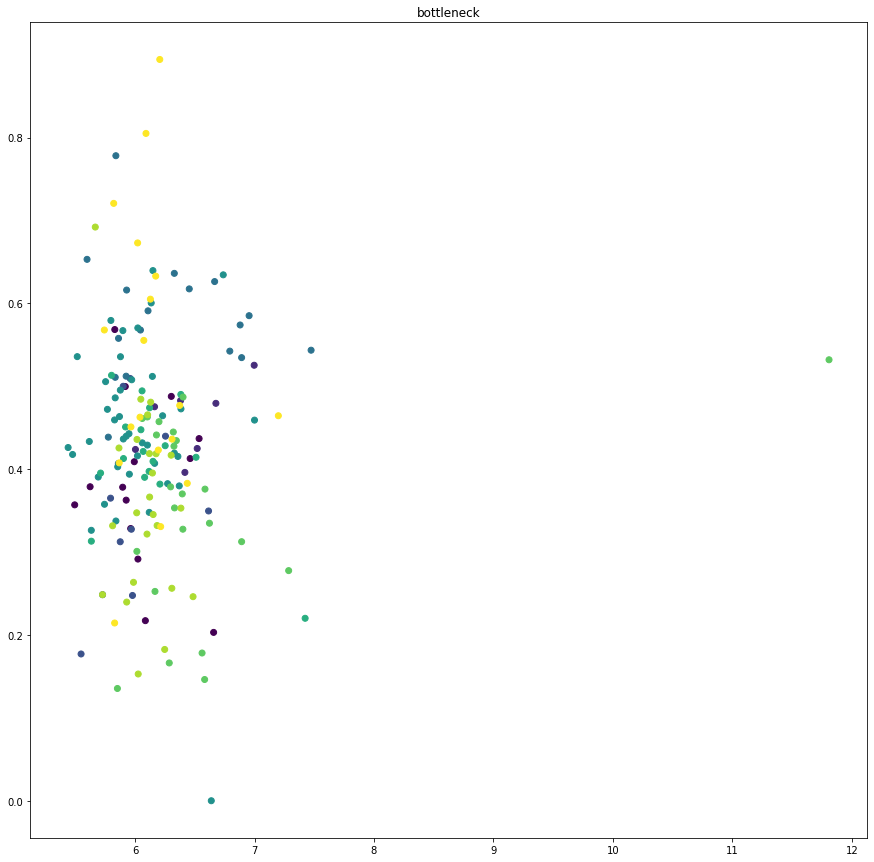

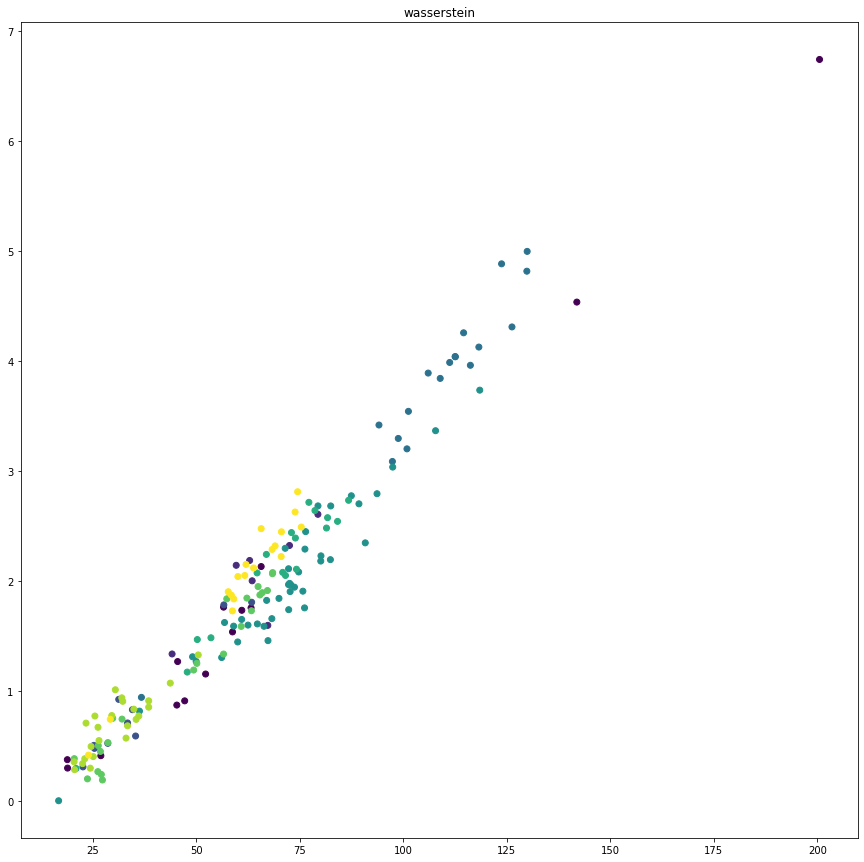

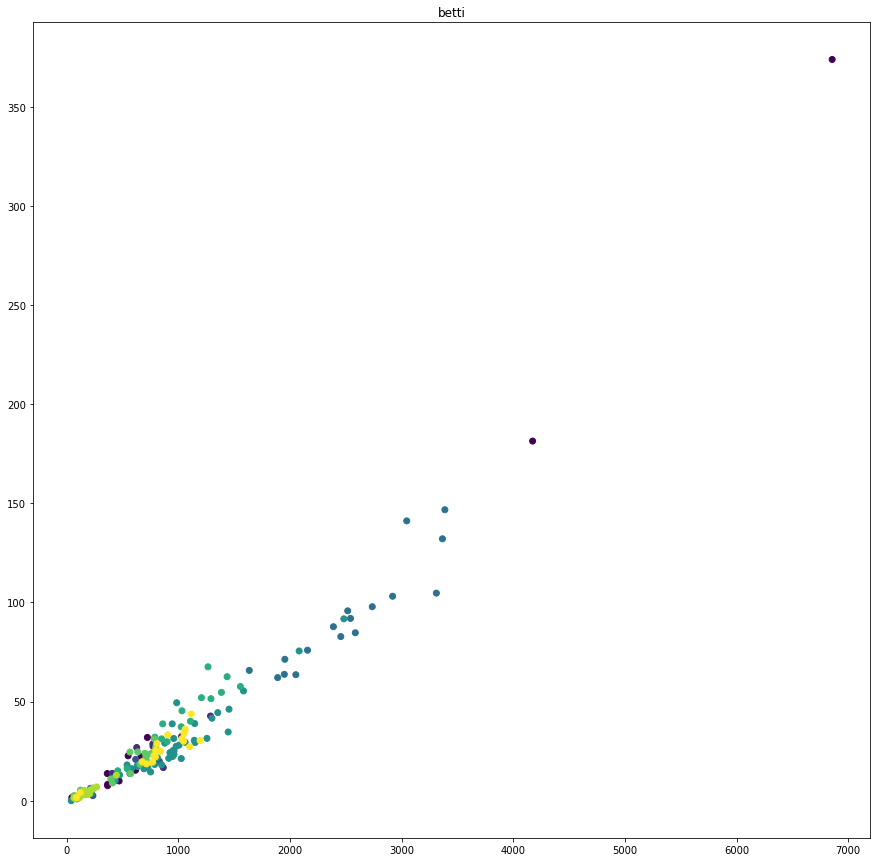

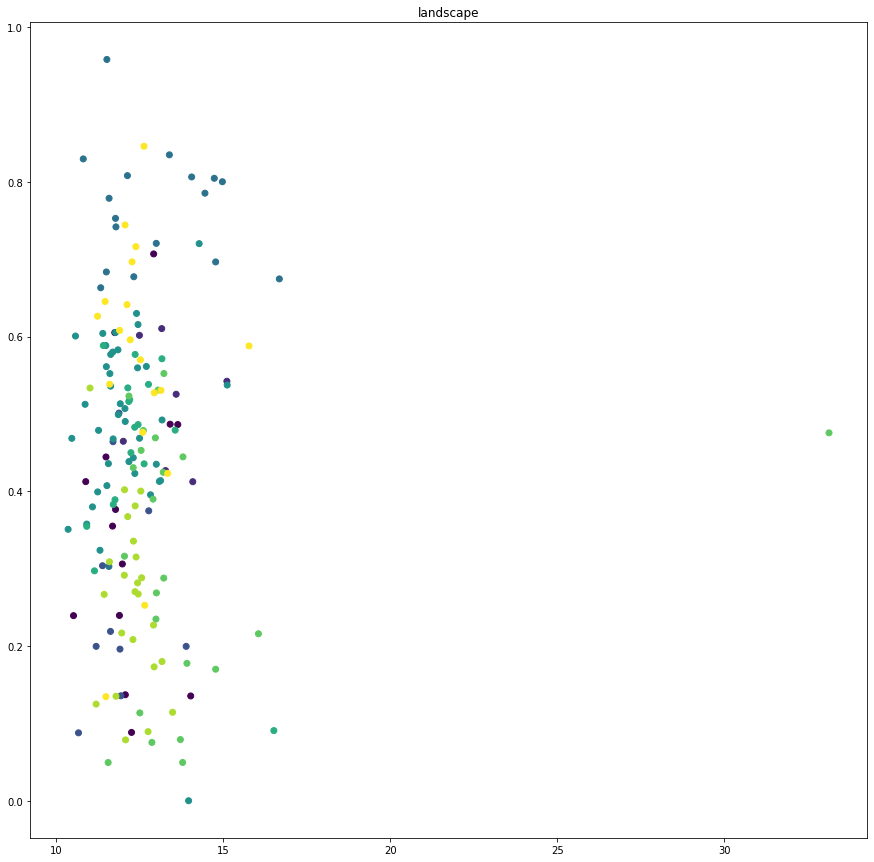

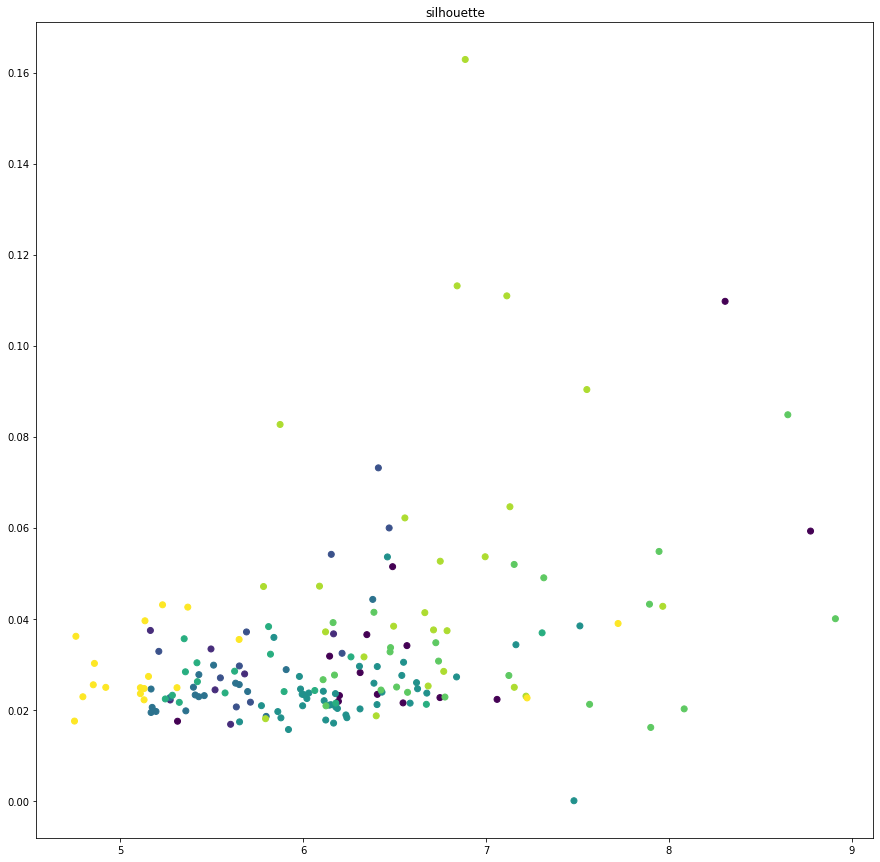

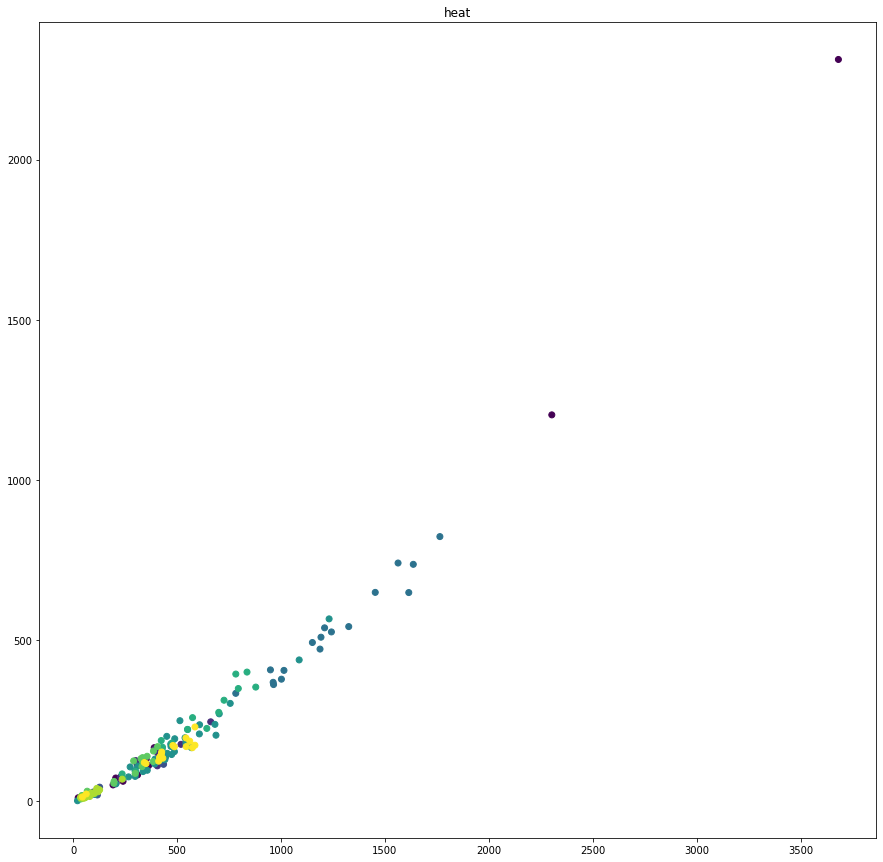

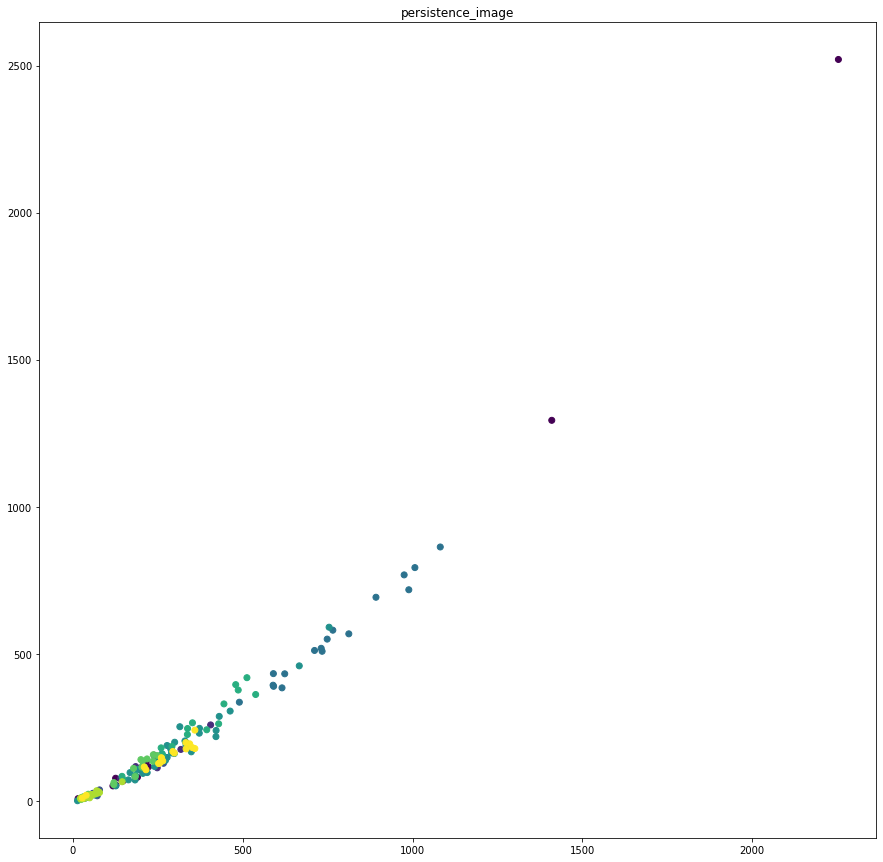

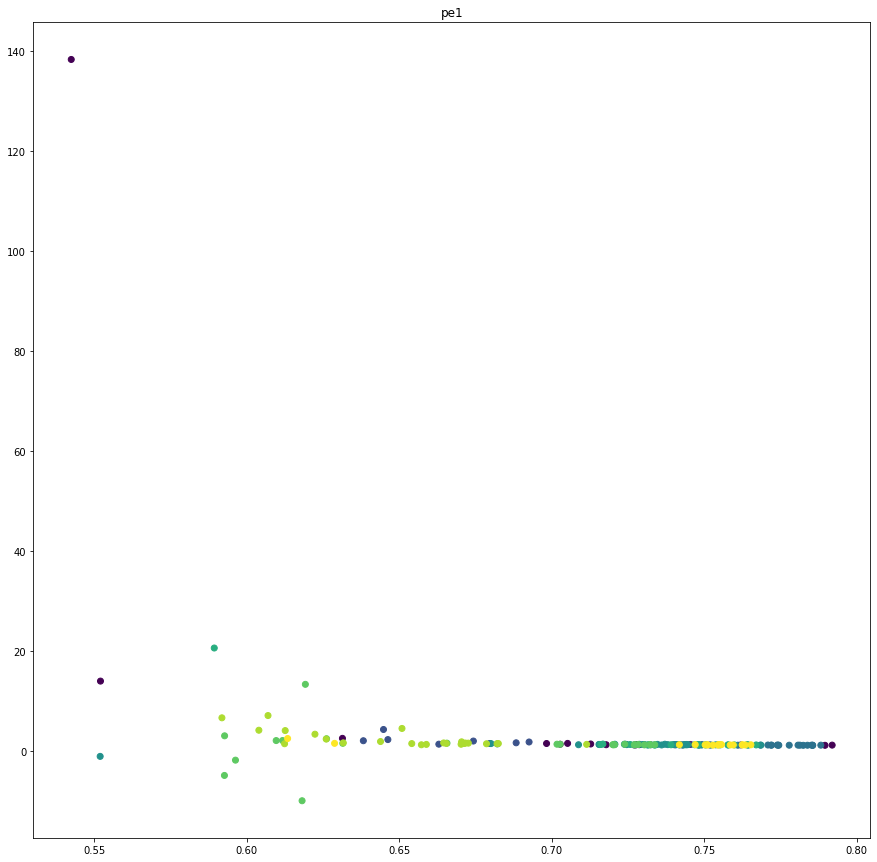

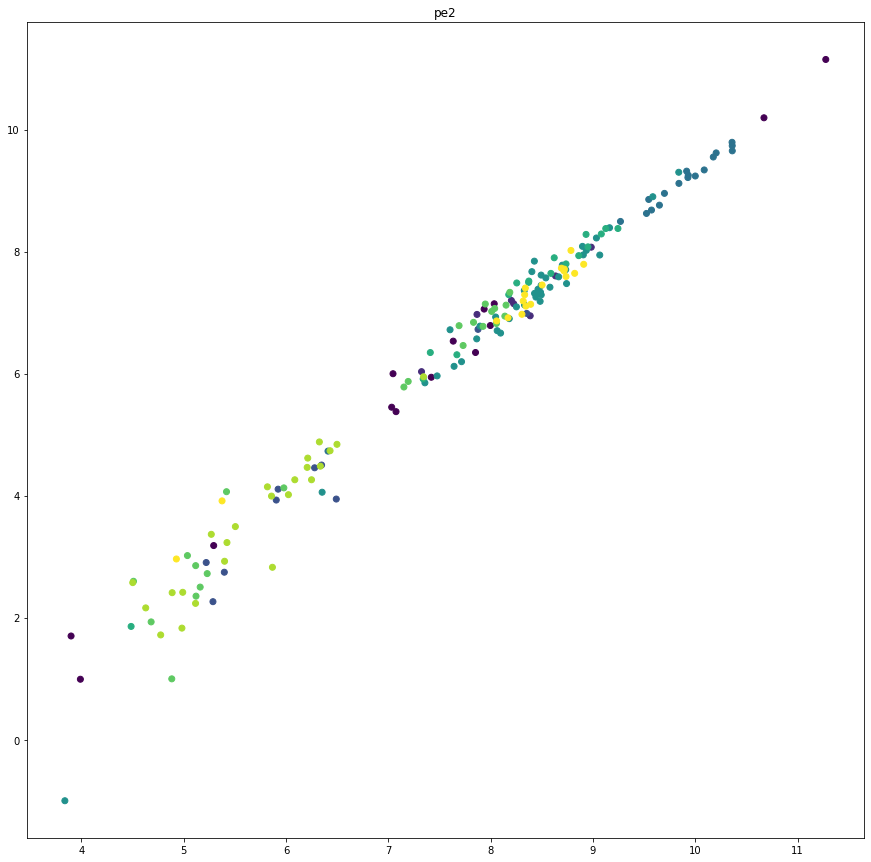

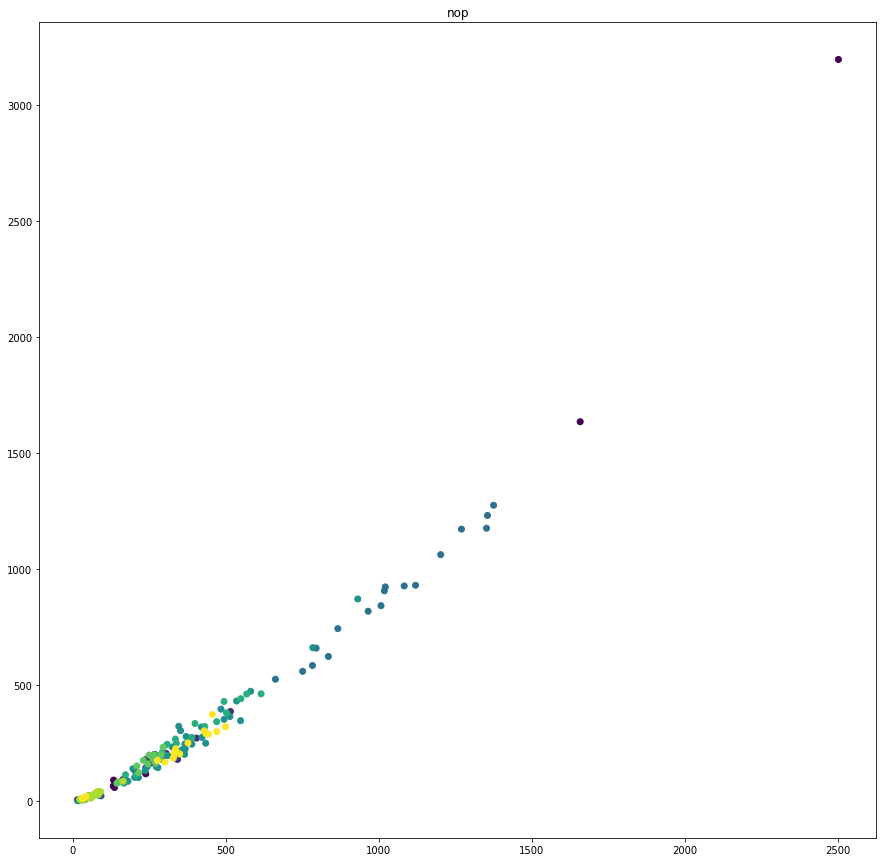

In [41]:
titles = ['bottleneck','wasserstein', 'betti', 'landscape', 'silhouette', 'heat', 'persistence_image', 'pe1', 'pe2', 'nop']
for i in range(10):
    plt.figure(figsize=(15,15))
    plt.scatter(X[:,2*i], X[:,2*i+1], c=cauthors)
    plt.title(titles[i])
    '''for j, txt in enumerate(sauthors):
        plt.annotate(txt, (X[:,2*i][j], X[:,2*i+1][j]))'''
    plt.show()

In [48]:
diff =np.diff(cauthors)
index = np.where(diff) #indici dove cambia labels

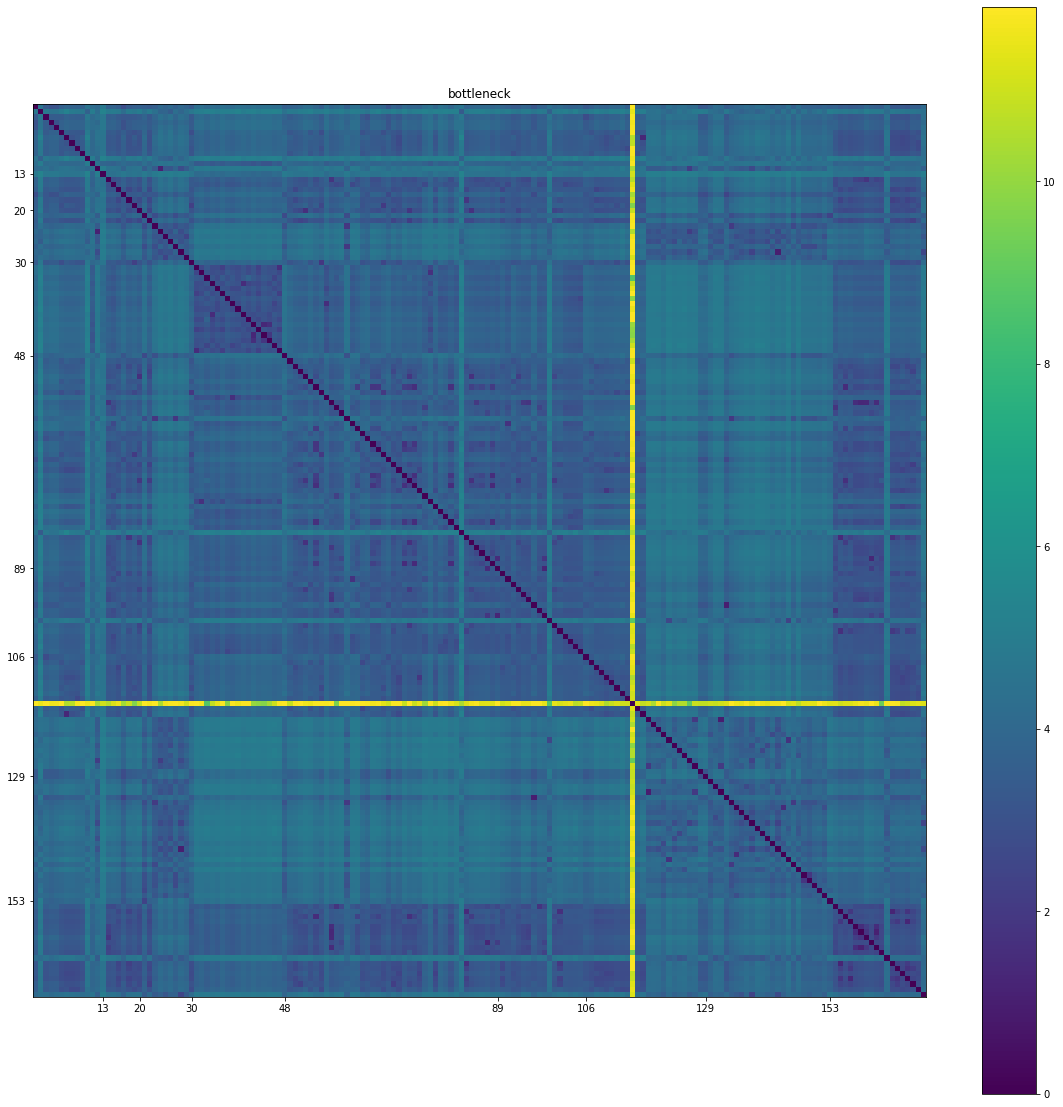

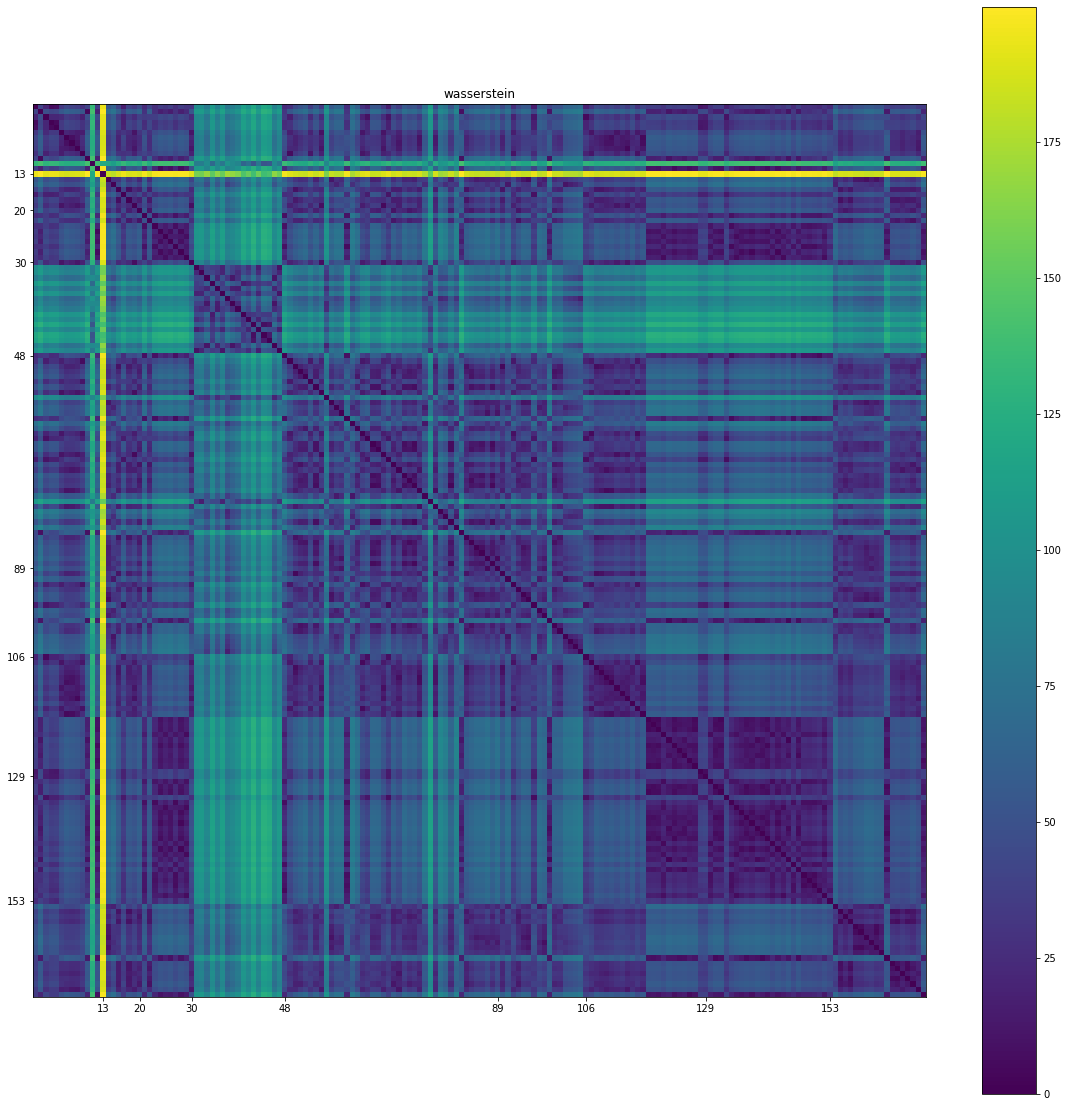

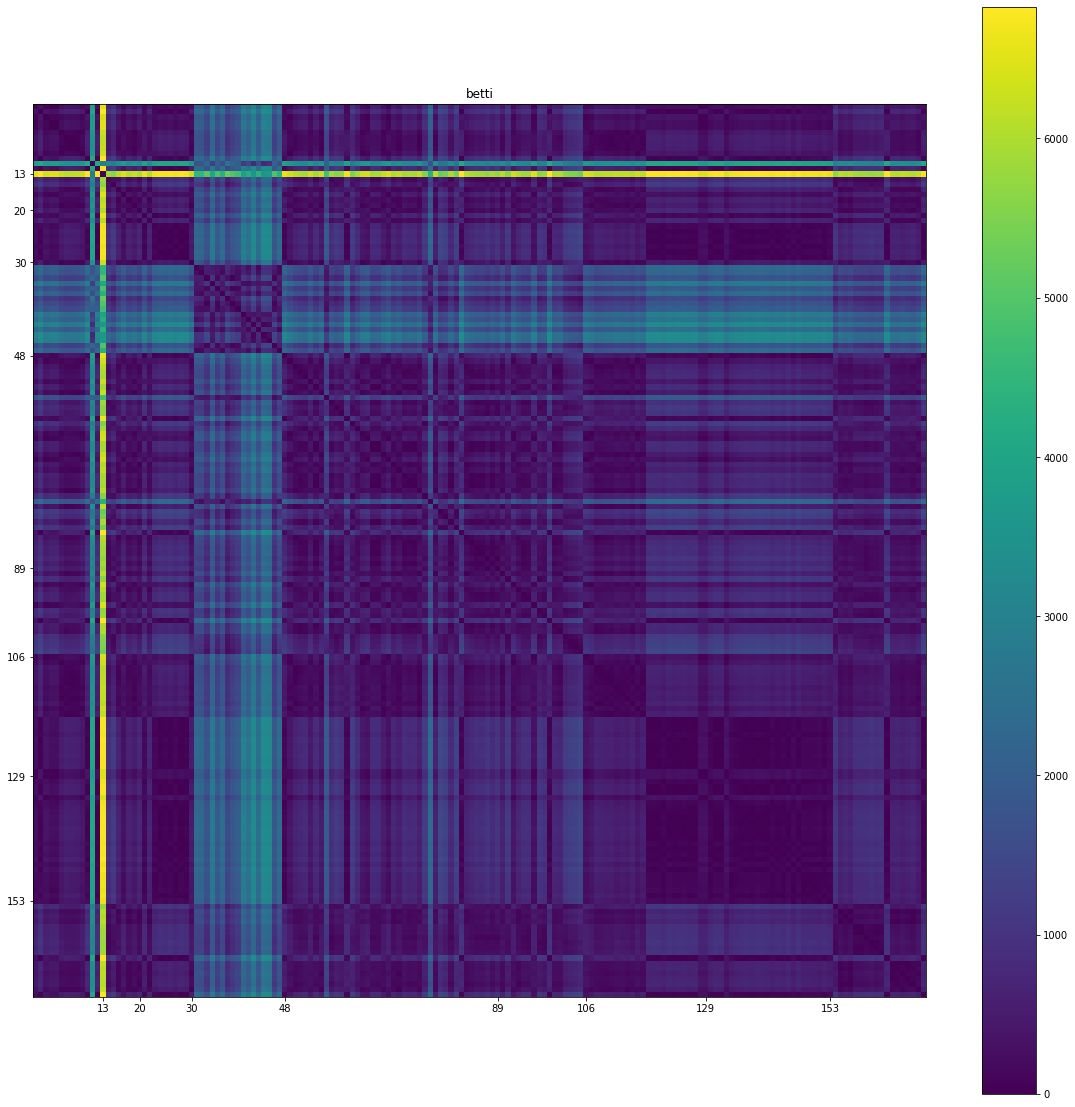

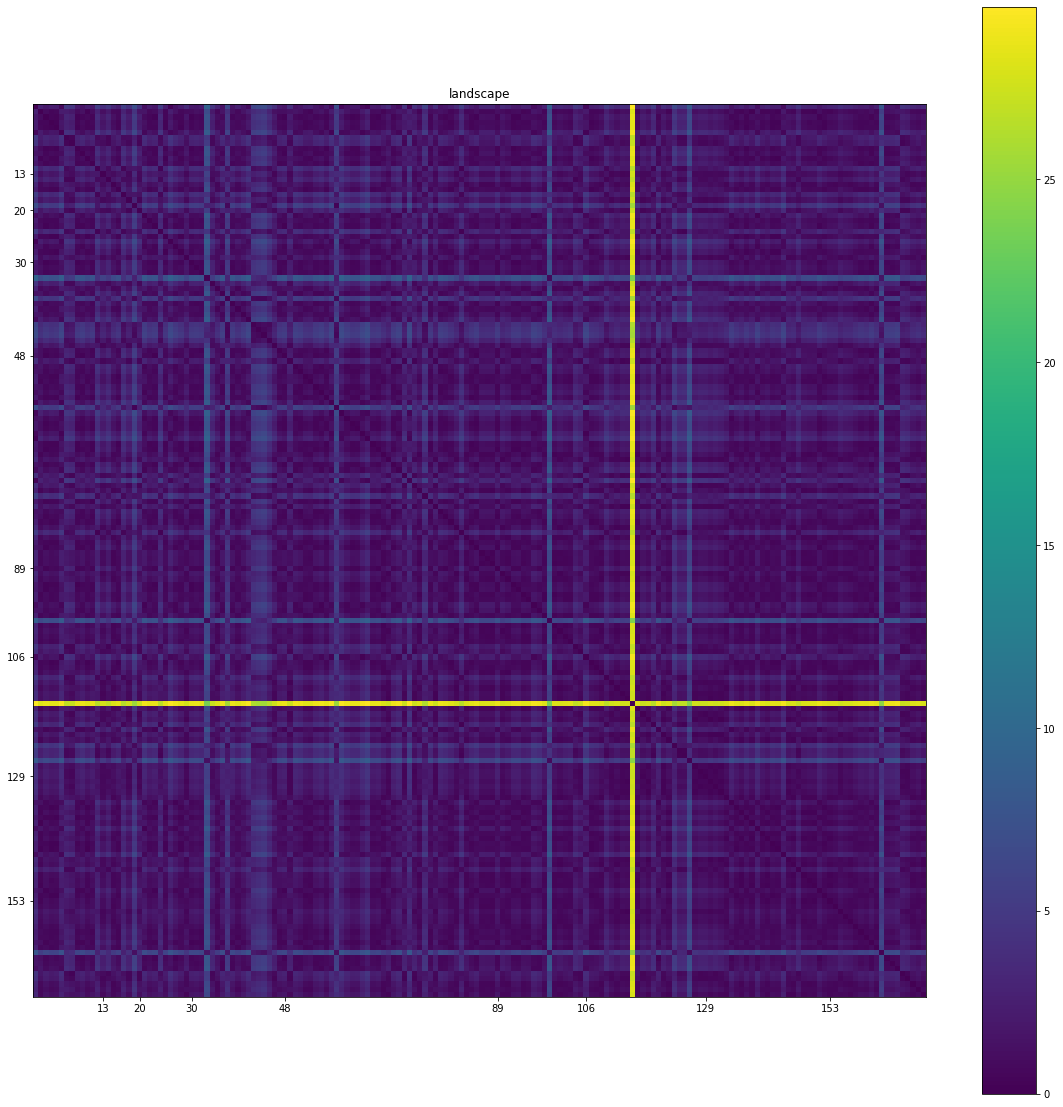

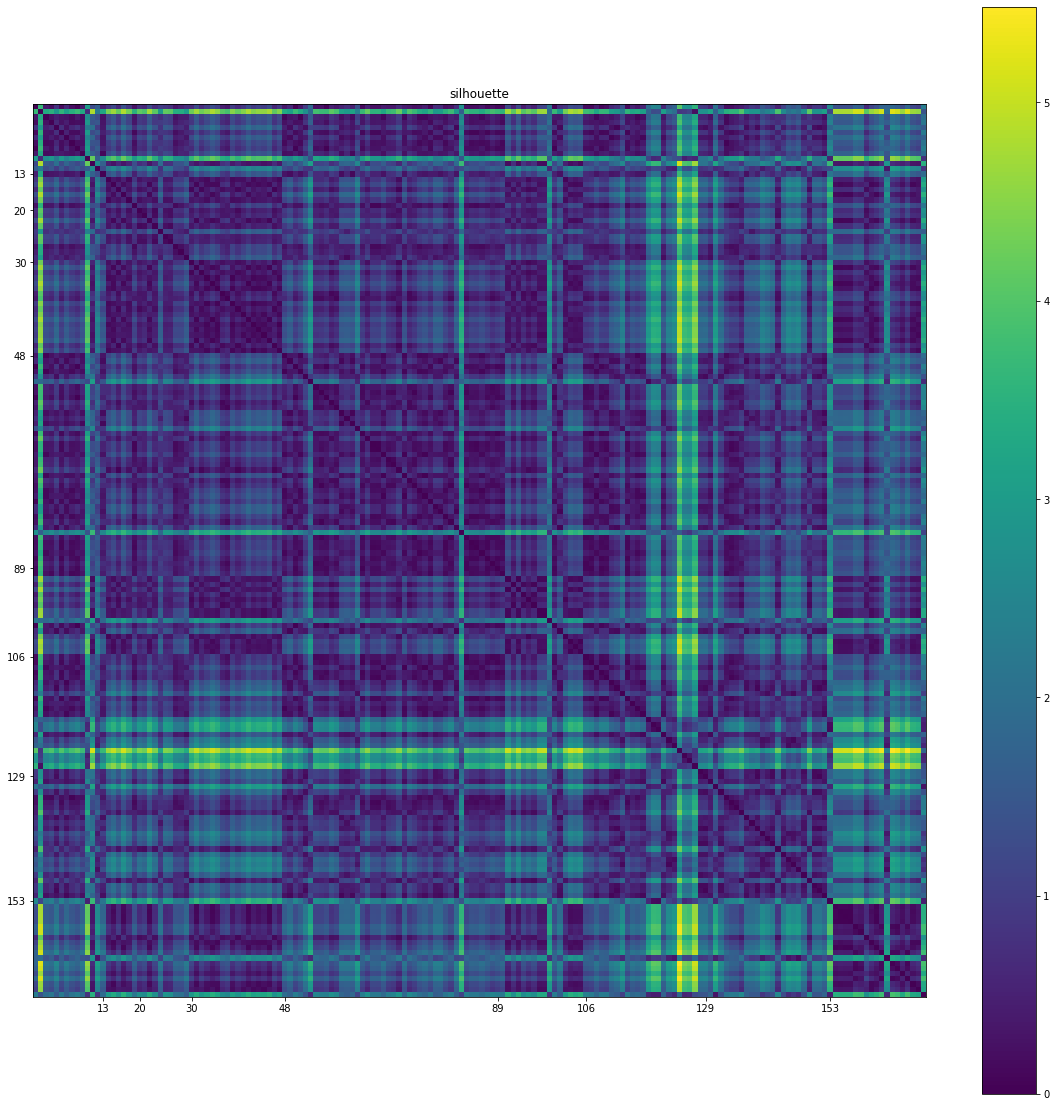

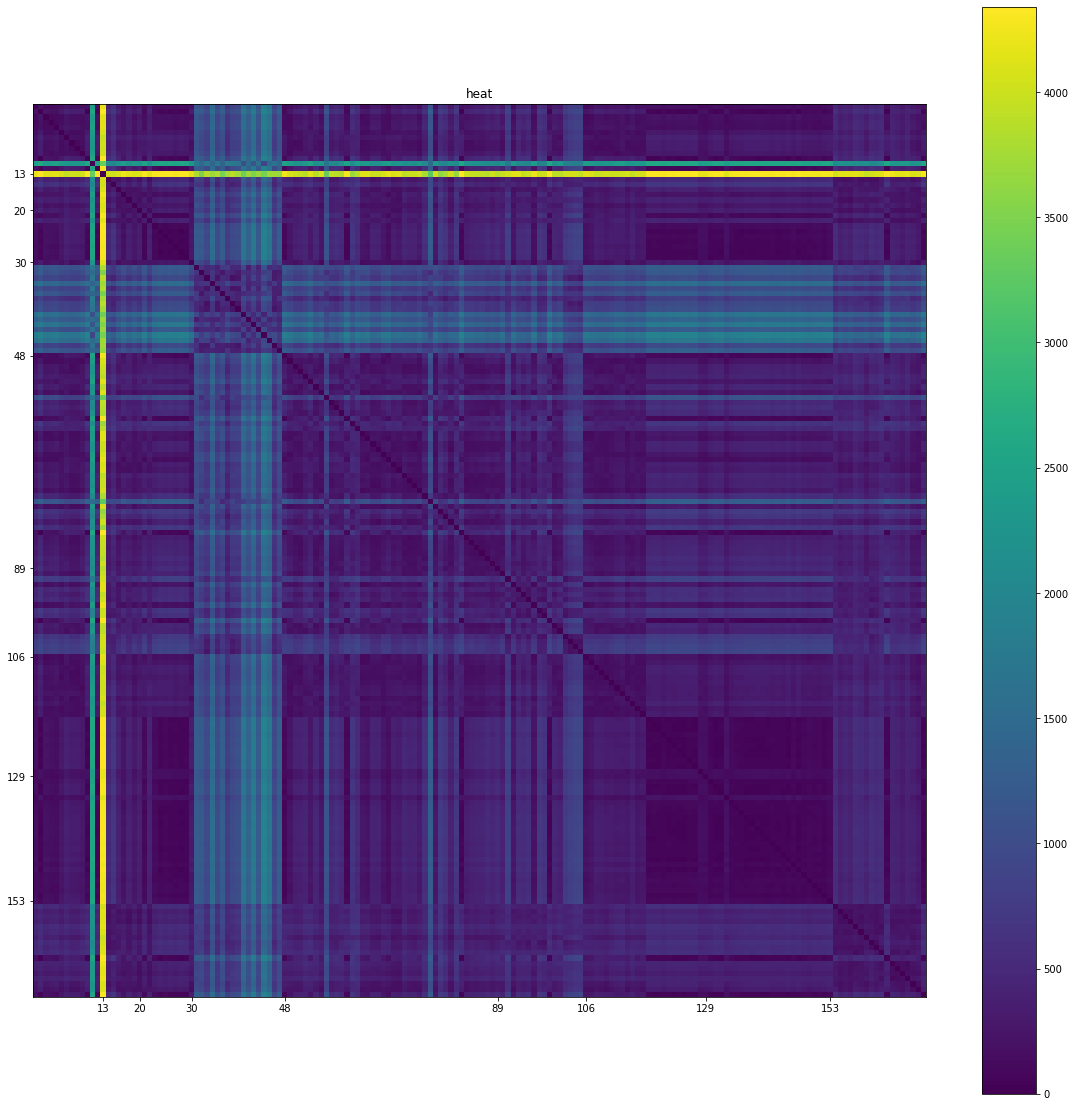

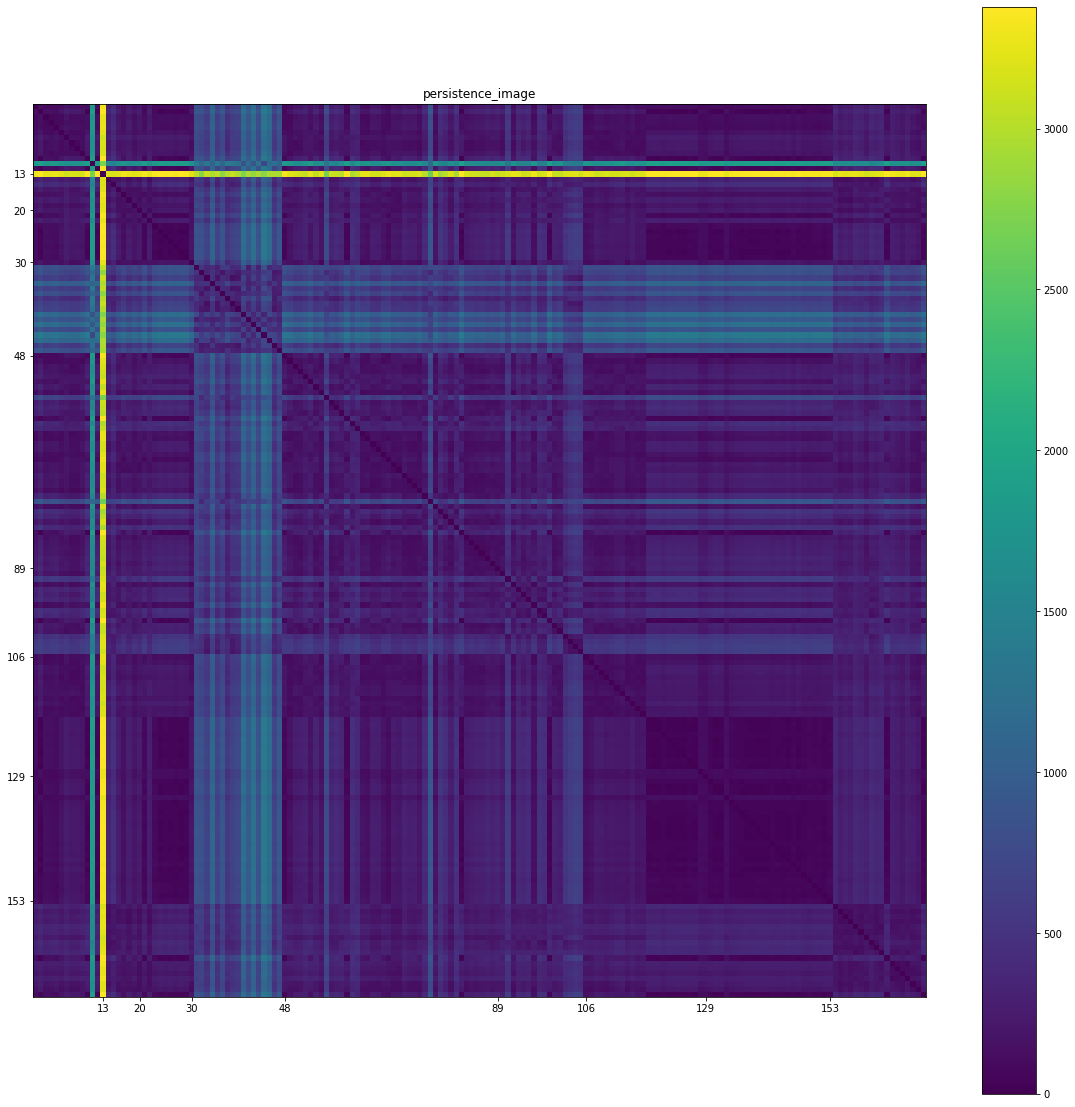

In [57]:
for metric in metrics:
    PD = PairwiseDistance(metric=metric, n_jobs=-1)
    mat = PD.fit_transform(pds)
    plt.figure(figsize=(20,20))
    plt.imshow(mat)
    #plt.grid(True)
    plt.title(metric)
    plt.xticks(index[0]);
    plt.yticks(index[0]);
    plt.colorbar()
    plt.show()

In [81]:
sauthors

['bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'bacon',
 'caesar',
 'caesar',
 'caesar',
 'caesar',
 'caesar',
 'caesar',
 'caesar',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'gestafrancorum',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'plautus',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'sen',
 'tacitus',
 'tacitus',
 'tacitus',
 'tacitus',
 

In [ ]:
import umap
import umap.plot

nn = [2,3,4,5,7,10,15,20,30,50,70,100]

for n in nn:
    mapper = umap.UMAP(n_neighbors=n)
    mapper.fit(X)

    umap.plot.points(mapper, labels=np.array(cauthors))
    plt.show()

In [77]:
ind = [2,3,4,5,8,9,10,11,16,17,18,19]

In [79]:
XR = np.array([X.T[i] for i in ind])
XR = XR.T
XR.shape

(172, 12)

In [ ]:
import umap
import umap.plot

nn = [2,3,4,5,7,10,15,20,30,50,70,100]

for n in nn:
    mapper = umap.UMAP(n_neighbors=n)
    mapper.fit(XR)

    umap.plot.points(mapper, labels=np.array(cauthors))
    plt.show()